In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hexagon_utilities import *
import matplotlib.pyplot as plt

### Create ColorLists for Use.

Named colors are useful.

In [3]:
import matplotlib.colors as mcolors
colors_d = mcolors.CSS4_COLORS
# Sort colors by hue, saturation, value and name
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                for name, color in colors_d.items())
mcolor_names = [name for hsv, name in by_hsv] #pluck the names, sorted by HSV



BLACK_WHITES = mcolor_names[:13]
RED_BROWNS = mcolor_names[14:29]
BROWNS = mcolor_names[29:36]
BEIGES = mcolor_names[36:49]
YELLOWS = mcolor_names[50:64]
GREENS = mcolor_names[64:81]
CYANS = mcolor_names[85: 99]
BLUES = mcolor_names[100:121]
PURPLES = mcolor_names[122:132]
PINKS = mcolor_names[132:145]

red_inds = [21, 22, 23, 24, 25, 26, 27, 145]
REDS = [mcolor_names[x] for x in red_inds]


color_sets = [REDS, PINKS, PURPLES, BLUES, CYANS, GREENS, YELLOWS, BEIGES, BROWNS, RED_BROWNS, BLACK_WHITES]

In [71]:
by_hsv

[((0.0, 0.0, 0.0), 'black'),
 ((0.0, 0.0, 0.4117647058823529), 'dimgray'),
 ((0.0, 0.0, 0.4117647058823529), 'dimgrey'),
 ((0.0, 0.0, 0.5019607843137255), 'gray'),
 ((0.0, 0.0, 0.5019607843137255), 'grey'),
 ((0.0, 0.0, 0.6627450980392157), 'darkgray'),
 ((0.0, 0.0, 0.6627450980392157), 'darkgrey'),
 ((0.0, 0.0, 0.7529411764705882), 'silver'),
 ((0.0, 0.0, 0.8274509803921568), 'lightgray'),
 ((0.0, 0.0, 0.8274509803921568), 'lightgrey'),
 ((0.0, 0.0, 0.8627450980392157), 'gainsboro'),
 ((0.0, 0.0, 0.9607843137254902), 'whitesmoke'),
 ((0.0, 0.0, 1.0), 'white'),
 ((0.0, 0.019607843137254943, 1.0), 'snow'),
 ((0.0, 0.23936170212765961, 0.7372549019607844), 'rosybrown'),
 ((0.0, 0.4666666666666667, 0.9411764705882353), 'lightcoral'),
 ((0.0, 0.551219512195122, 0.803921568627451), 'indianred'),
 ((0.0, 0.7454545454545455, 0.6470588235294118), 'brown'),
 ((0.0, 0.8089887640449438, 0.6980392156862745), 'firebrick'),
 ((0.0, 1.0, 0.5019607843137255), 'maroon'),
 ((0.0, 1.0, 0.5450980392156862

# Let's write (Annotate) xyz coords of each hexagon

In [4]:
def save_file(title=None, details=None):
    SAVE_FILE = True
    if SAVE_FILE:
        fn = ''
        if title is not None:
            fn += title
            
        if details is not None:
            fn+= details
            
        dtstr = datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%p")

            
        plt.savefig(f'../images/{fn+dtstr}.jpg')

In [6]:
def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=10)

(-10.0, 15.0, -8.0, 8.0)

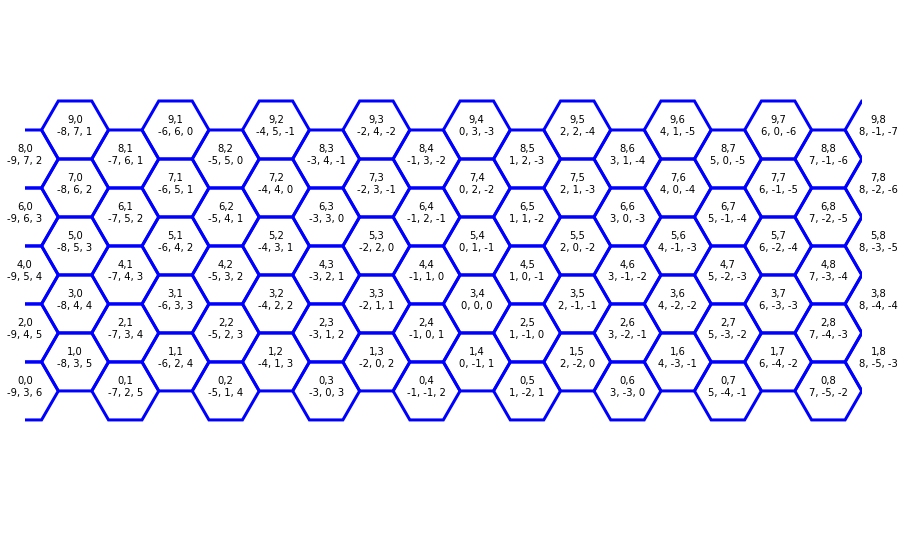

In [31]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}
hg = HexGrid(10,9,1, flat=True)

for idx, h in enumerate(hg.hlist):
    h.render(fill=None, lw=3, color='blue')
    lab = str(h.row)+ ',' + str(h.col) +'\n' + ', '.join([str(c) for c in (h.xc,h.yc,h.zc)])
    label((h.x,h.y), lab)

    
ax.axis('scaled')
ax.set_xlim(-10, 15)
ax.set_ylim(-8, 8)
plt.axis('off')


#save_file('Inset_')

In [41]:
flat=True
from math import cos
flat_radians = []
for i in range(6):
    if flat:
        angle_rad = PI / 180 * (60*i)
        flat_radians.append(angle_rad)
        print(angle_rad)
    
    
#center.x + size * cos(angle_rad)
#center.y + size * sin(angle_rad)


0.0
1.0471975511965976
2.0943951023931953
3.141592653589793
4.1887902047863905
5.235987755982989


In [44]:
xv = [round(cos(a), 2) for a in flat_radians]

In [57]:
yv = [round(sin(a), 10) for a in flat_radians]

In [58]:
list(zip(xv, yv))

[(1.0, 0.0),
 (0.5, 0.8660254038),
 (-0.5, 0.8660254038),
 (-1.0, 0.0),
 (-0.5, -0.8660254038),
 (0.5, -0.8660254038)]

In [68]:
size=1
voffsetx=[size * x for x in [round(cos(a), 2) for a in flat_radians]]
voffsety=[size * sin(flat_radians[x]) for x in range(6)]

In [70]:
cx , centery = 5, 10
print( [(cx + xoff) for xoff in voffsetx],
    [(centery + yoff) for yoff in voffsety])


[6.0, 5.5, 4.5, 4.0, 4.5, 5.5] [10.0, 10.86602540378444, 10.86602540378444, 10.0, 9.13397459621556, 9.13397459621556]
